# Data Mining Homework 3
## Question 2
### Mohammad Bahrami - 9724133

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part a
Data Preparation

In [2]:
dataset = pd.read_csv('student.csv', sep=';').drop(['G1', 'G2'], axis=1)
dataset.rename(columns={'G3': 'target'}, inplace=True)

#OneHot Encoding the Categorical Variables
from sklearn.preprocessing import OneHotEncoder

non_numeric_columns = ~np.isin(dataset.columns, dataset.select_dtypes(np.number).columns)

dataset.loc[:, non_numeric_columns] = dataset.loc[:, non_numeric_columns].apply(
    lambda z: pd.Series(
        OneHotEncoder(sparse=False).fit_transform(z.to_numpy().reshape((-1, 1))).tolist(),
        index=z.index
        ),
    axis=0)

dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,target
0,"[1.0, 0.0]","[1.0, 0.0]",18,"[0.0, 1.0]","[1.0, 0.0]","[1.0, 0.0]",4,4,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",...,"[1.0, 0.0]","[1.0, 0.0]",4,3,4,1,1,3,4,11
1,"[1.0, 0.0]","[1.0, 0.0]",17,"[0.0, 1.0]","[1.0, 0.0]","[0.0, 1.0]",1,1,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",...,"[0.0, 1.0]","[1.0, 0.0]",5,3,3,1,1,3,2,11
2,"[1.0, 0.0]","[1.0, 0.0]",15,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]",1,1,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",...,"[0.0, 1.0]","[1.0, 0.0]",4,3,2,2,3,3,6,12
3,"[1.0, 0.0]","[1.0, 0.0]",15,"[0.0, 1.0]","[1.0, 0.0]","[0.0, 1.0]",4,2,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]",...,"[0.0, 1.0]","[0.0, 1.0]",3,2,2,1,1,5,0,14
4,"[1.0, 0.0]","[1.0, 0.0]",16,"[0.0, 1.0]","[1.0, 0.0]","[0.0, 1.0]",3,3,"[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",...,"[1.0, 0.0]","[1.0, 0.0]",4,3,2,1,2,5,0,13


In [3]:
X = np.concatenate((
    dataset.loc[:, (~non_numeric_columns) & (dataset.columns != 'target')],
    np.stack(dataset.loc[:, non_numeric_columns].apply(np.concatenate, axis=1))
), axis=1)

Y = dataset['target'].to_numpy()

X_names = np.concatenate((
    dataset.loc[:, (~non_numeric_columns) & (dataset.columns != 'target')].columns,
    np.concatenate(
        dataset.loc[[0], non_numeric_columns].apply(
            lambda z: [f'{z.name}{i}' for i in range(1, len(z[0])+1)],
            axis=0
        )
    )
))

### Part b
RFECV

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
estim = LinearRegression()
selector = RFECV(estimator=estim, scoring='neg_mean_squared_log_error').fit(X, Y)

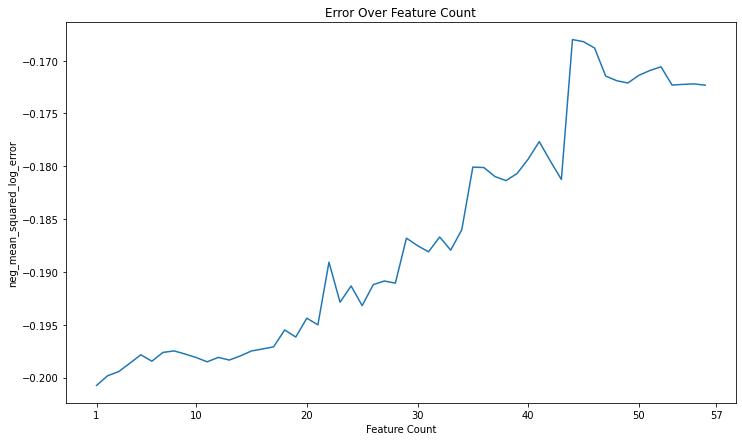

In [5]:
# Scoring Over num_Features Plot
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, selector.cv_results_['mean_test_score'].shape[0]+1),
    selector.cv_results_['mean_test_score']
)
ax.set_xticks([1] + np.arange(10, selector.cv_results_['mean_test_score'].shape[0]+1, 10).tolist() + [selector.cv_results_['mean_test_score'].shape[0]+1])
ax.set_title('Error Over Feature Count')
ax.set_xlabel('Feature Count')
ax.set_ylabel('neg_mean_squared_log_error')
fig.set_size_inches((12, 7))

In [6]:
#Feature Importance
F_rank_df = pd.DataFrame(index=X_names, columns=['Importance', 'Rank'])
F_rank_df.loc[:, 'Importance'] = selector.ranking_
F_rank_df.sort_values(by='Importance', ascending=False, kind='mergsort', inplace=True)
F_rank_df.loc[:, 'Rank'] = F_rank_df['Importance'].rank(ascending=False, method='dense').astype(int)
F_rank_df

,Importance,Rank
Medu,13,1
absences,12,2
traveltime,11,3
goout,10,4
Walc,9,5
age,8,6
Fedu,7,7
freetime,6,8
famrel,5,9
health,4,10
